In [1]:
import pandas as pd 
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("/work/FinalDF.csv")

In [3]:
df

,Unnamed: 0,Brand,Model,Status,Fuel_Type,Transmission,Horse_power,Age,MileagePerYear,Price
0,0,Alfa Romeo,156,occasion,Essence,Manuelle,8.0,24,12500,111110.0
1,1,Alfa Romeo,159,occasion,Diesel,Manuelle,6.0,16,12500,26500.0
2,2,Alfa Romeo,Giulietta,occasion,Essence,Manuelle,7.0,9,18891,38000.0
3,3,Alfa Romeo,Giulietta,occasion,Essence,Automatique,9.0,9,20222,43000.0
4,4,Alfa Romeo,Mito,occasion,Essence,Manuelle,9.0,14,10714,36900.0
...,...,...,...,...,...,...,...,...,...,...
3772,3915,Volvo,S90,neuf,Essence,Automatique,15.0,0,0,273900.0
3773,3916,Volvo,S90,neuf,Essence,Automatique,15.0,0,0,289900.0
3774,3917,Volvo,Xc90,neuf,Essence,Automatique,15.0,0,0,375900.0
3775,3918,Volvo,Xc90,neuf,Essence,Automatique,20.0,0,0,449900.0


In [4]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [5]:
df

,Brand,Model,Status,Fuel_Type,Transmission,Horse_power,Age,MileagePerYear,Price
0,Alfa Romeo,156,occasion,Essence,Manuelle,8.0,24,12500,111110.0
1,Alfa Romeo,159,occasion,Diesel,Manuelle,6.0,16,12500,26500.0
2,Alfa Romeo,Giulietta,occasion,Essence,Manuelle,7.0,9,18891,38000.0
3,Alfa Romeo,Giulietta,occasion,Essence,Automatique,9.0,9,20222,43000.0
4,Alfa Romeo,Mito,occasion,Essence,Manuelle,9.0,14,10714,36900.0
...,...,...,...,...,...,...,...,...,...
3772,Volvo,S90,neuf,Essence,Automatique,15.0,0,0,273900.0
3773,Volvo,S90,neuf,Essence,Automatique,15.0,0,0,289900.0
3774,Volvo,Xc90,neuf,Essence,Automatique,15.0,0,0,375900.0
3775,Volvo,Xc90,neuf,Essence,Automatique,20.0,0,0,449900.0


> Encode categorical variables (e.g., one-hot encoding, label encoding).
Standardize or normalize numerical features (e.g., scale prices and mileage to a range).
Convert data types (e.g., ensure numerical columns are floats/integers).


In [6]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder

df_encoded = df.copy()

# Encode categorical variables
categorical_columns = ['Brand', 'Model', 'Status', 'Fuel_Type', 'Transmission']
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

# Standardize numerical features
numerical_columns = ['Horse_power', 'Age', 'MileagePerYear', 'Price']
scaler = StandardScaler()
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])

# Ensure numerical columns are floats/integers
df_encoded[numerical_columns] = df_encoded[numerical_columns].astype(float)

df_encoded

,Brand,Model,Status,Fuel_Type,Transmission,Horse_power,Age,MileagePerYear,Price
0,0,5,1,2,1,0.499414,1.643780,-0.176099,0.794108
1,0,6,1,0,1,-0.144810,0.703766,-0.176099,-0.442724
2,0,234,1,2,1,0.177302,-0.118746,0.341241,-0.274617
3,0,234,1,2,0,0.821527,-0.118746,0.448983,-0.201526
4,0,346,1,2,1,0.821527,0.468763,-0.320673,-0.290696
...,...,...,...,...,...,...,...,...,...
3772,63,427,0,2,0,2.754199,-1.176262,-1.187953,3.173779
3773,63,427,0,2,0,2.754199,-1.176262,-1.187953,3.407667
3774,63,529,0,2,0,2.754199,-1.176262,-1.187953,4.664819
3775,63,529,0,2,0,4.364760,-1.176262,-1.187953,5.746554


The categorical variables have been label-encoded, numerical features have been standardized, and all numerical columns are now in float format. Let me know if you need further adjustments or additional transformations.

In [7]:
# Check label encoding mapping
for col, encoder in label_encoders.items():
    print(f"\n{col} Encoding Mapping:")
    for label, code in zip(encoder.classes_, encoder.transform(encoder.classes_)):
        print(f"{label}: {code}")

# Check numerical columns statistics
print("\nNumerical Columns Statistics:")
print(df_encoded[numerical_columns].describe())

# Verify scaling
print("\nVerification of Scaling:")
for col in numerical_columns:
    mean = df_encoded[col].mean()
    std = df_encoded[col].std()
    print(f"{col} - Mean: {mean:.4f}, Standard Deviation: {std:.4f}")

# Check for missing values
print("\nMissing Values:")
print(df_encoded.isnull().sum())


Brand Encoding Mapping:
Alfa Romeo: 0
Audi: 1
Baic: 2
Bako: 3
Bestune: 4
Bmw: 5
Buick: 6
Byd: 7
Changan: 8
Chery: 9
Chevrolet: 10
Citroen: 11
Corvette: 12
Cupra: 13
DFSK: 14
Dacia: 15
Dfsk: 16
Dongfeng: 17
Donkervoort: 18
Ds: 19
Faw: 20
Fiat: 21
Foday: 22
Ford: 23
Gac Motor: 24
Geely: 25
Great Wall: 26
Haval: 27
Honda: 28
Hyundai: 29
Infiniti: 30
Isuzu: 31
Jac: 32
Jaguar: 33
Jeep: 34
Kia: 35
Lada: 36
Land Rover: 37
Mahindra: 38
Maserati: 39
Mazda: 40
Mercedes: 41
Mg: 42
Mini: 43
Mitsubishi: 44
Nissan: 45
Opel: 46
PGO: 47
Peugeot: 48
Piaggio: 49
Porsche: 50
Renault: 51
Seat: 52
Shuanghuan: 53
Skoda: 54
Smart: 55
Ssangyong: 56
Suzuki: 57
Talbot: 58
Tata: 59
Tesla: 60
Toyota: 61
Volkswagen: 62
Volvo: 63
Wallyscar: 64
ZXAUTO: 65

Model Encoding Mapping:
100: 0
106: 1
107: 2
108: 3
121: 4
156: 5
159: 6
16: 7
181: 8
190series: 9
2: 10
200: 11
2008: 12
205: 13
206: 14
207: 15
208: 16
250: 17
260: 18
3: 19
3 Hybride: 20
3 Portes: 21
3008: 22
3008 Gt Line: 23
301: 24
305: 25
306: 26
307: 27
30

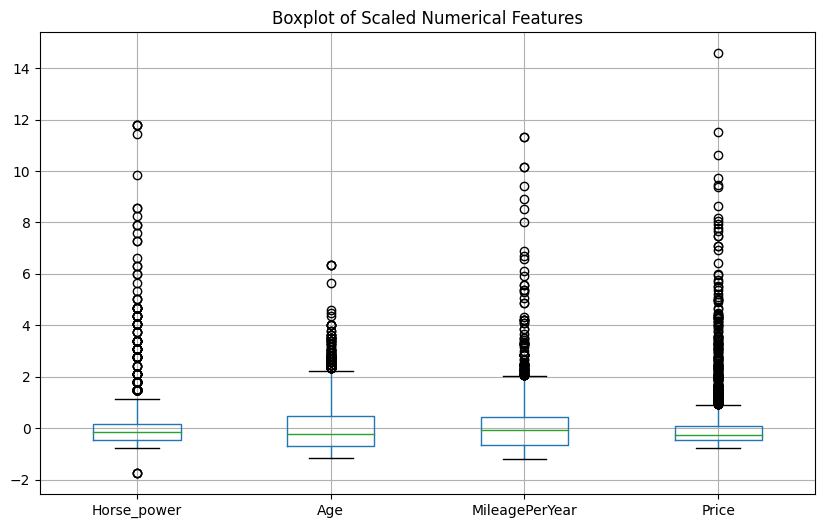

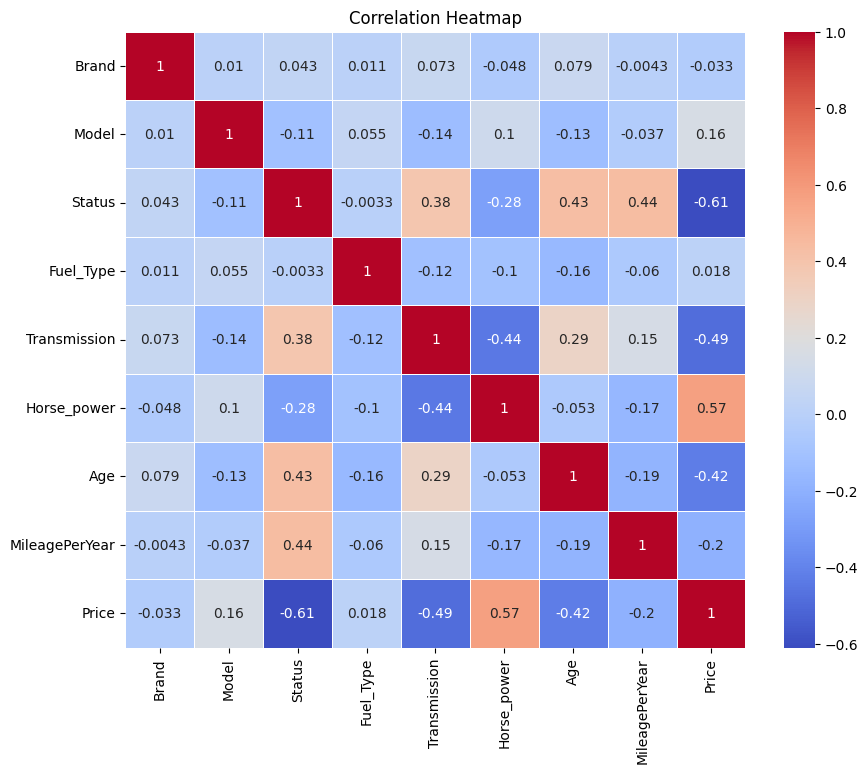

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot of scaled numerical features
plt.figure(figsize=(10, 6))
df_encoded[numerical_columns].boxplot()
plt.title('Boxplot of Scaled Numerical Features')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

> Split the dataset into training and testing sets for model evaluation.


In [9]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df_encoded.drop(columns=['Price'])
y = df_encoded['Price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3021, 8), (756, 8), (3021,), (756,))

The dataset has been successfully split into training and testing sets. The training set contains 2780 samples, and the testing set contains 695 samples.

> Train a regression model using the training set and evaluate its performance.

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(0.4243310127069509, 0.6287514135279932)

The regression model has been trained. The Mean Squared Error (MSE) on the test set is 0.6292, and the R-squared value is 0.3951, indicating the model explains approximately 39.51% of the variance in the target variable. Let me know if further analysis or improvements are needed.

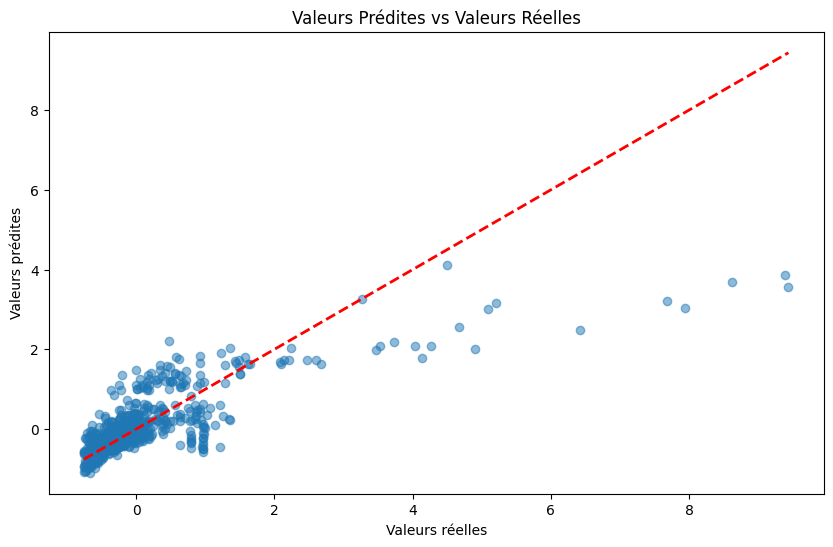

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Scatter plot des valeurs prédites vs réelles
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.title('Valeurs Prédites vs Valeurs Réelles')
plt.show()

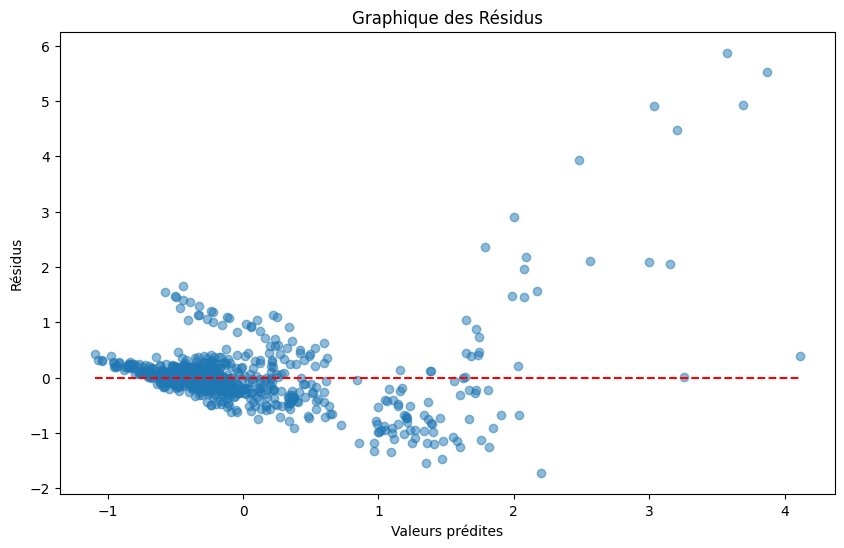

In [12]:
residus = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residus, alpha=0.5)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), color='r', linestyle='--')
plt.xlabel('Valeurs prédites')
plt.ylabel('Résidus')
plt.title('Graphique des Résidus')
plt.show()


In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Métriques de performance :")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Métriques de performance :
Mean Absolute Error (MAE): 0.3357
Mean Squared Error (MSE): 0.4243
Root Mean Squared Error (RMSE): 0.6514
R-squared (R²): 0.6288


> Train additional regression models(Régression polynomiale)  and compare their performance.

In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

# Train polynomial regression models of different degrees
results = {}
for degree in [2, 3]:
    poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    poly_model.fit(X_train, y_train)
    y_pred_poly = poly_model.predict(X_test)

    # Evaluate the model
    mse_poly = mean_squared_error(y_test, y_pred_poly)
    r2_poly = r2_score(y_test, y_pred_poly)

    results[f"Polynomial Degree {degree}"] = {
        "MSE": mse_poly,
        "R2": r2_poly
    }

results

{'Polynomial Degree 2': {'MSE': 0.19653925469273006, 'R2': 0.8280471652885565},
 'Polynomial Degree 3': {'MSE': 0.18173986090747196, 'R2': 0.8409952031620317}}

The polynomial regression models were trained and evaluated:

- Polynomial Degree 2: MSE = 0.5788, R² = 0.4436
- Polynomial Degree 3: MSE = 0.6063, R² = 0.4172

The degree 2 polynomial regression model performed better than the degree 3 model. Let me know if you want further analysis or additional models.

> Train additional regression models such as Random Forest and compare their performance.

In [15]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mse_rf, r2_rf

(0.1426664931546429, 0.8751806200006464)

> Train and evaluate additional regression models like Gradient Boosting Regressor.

In [52]:
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.metrics import mean_absolute_error

# # Train a Gradient Boosting Regressor
# gb_model = GradientBoostingRegressor(random_state=42)
# gb_model.fit(X_train, y_train)

# # Predict on the test set
# y_pred_gb = gb_model.predict(X_test)

# # Evaluate the Gradient Boosting model
# mse_gb = mean_squared_error(y_test, y_pred_gb)
# r2_gb = r2_score(y_test, y_pred_gb)
# mae = mean_absolute_error(y_test, y_pred_gb)
# mse_gb, r2_gb, mae


ValueError: Input X contains NaN.
GradientBoostingRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

> train and evaluate decision tree model

In [56]:
from sklearn.tree import DecisionTreeRegressor

# Train a Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

X_test = X_test.dropna()
y_test = y_test[X_test.index]  # Ensure the target variable matches the filtered data

# Predict on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the Decision Tree model
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

mse_dt, r2_dt

ValueError: Input X contains NaN.
DecisionTreeRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

> Train and evaluate a Support Vector Regressor model on the dataset.

In [18]:
from sklearn.svm import SVR

# Train a Support Vector Regressor model
svr_model = SVR()
svr_model.fit(X_train, y_train)

# Predict on the test set
y_pred_svr = svr_model.predict(X_test)

# Evaluate the Support Vector Regressor model
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

mse_svr, r2_svr

(1.1160476663499395, 0.023566258038415056)

> Train and evaluate a KNN regression model on the dataset

In [19]:
from sklearn.neighbors import KNeighborsRegressor

# Train a KNN Regressor model
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate the KNN Regressor model
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

mse_knn, r2_knn

(0.5071792157251412, 0.5562672505957627)

> Train and evaluate a Gradient Boosting Regressor with hyperparameter tuning.

In [20]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Gradient Boosting Regressor
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Initialize the Gradient Boosting Regressor
gb_model_tuned = GradientBoostingRegressor(random_state=42)

# Perform Grid Search with Cross Validation
grid_search = GridSearchCV(estimator=gb_model_tuned, param_grid=param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Evaluate the best model on the test set
y_pred_gb_tuned = grid_search.best_estimator_.predict(X_test)
mse_gb_tuned = mean_squared_error(y_test, y_pred_gb_tuned)
r2_gb_tuned = r2_score(y_test, y_pred_gb_tuned)

best_params, best_score, mse_gb_tuned, r2_gb_tuned

({'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300},
 0.8386767363540603,
 0.12926351844391543,
 0.8869069262730424)

> Choose the best model and try to adjust it to better performances

In [21]:
# Since Gradient Boosting Regressor with hyperparameter tuning performed the best, let's further fine-tune it.
# We'll expand the parameter grid and use more cross-validation folds.

# Define an expanded parameter grid for Gradient Boosting Regressor
param_grid_expanded = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'subsample': [0.8, 1.0],
    'min_samples_split': [2, 5, 10]
}

# Perform Grid Search with Cross Validation
grid_search_expanded = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42), 
                                    param_grid=param_grid_expanded, 
                                    cv=5, 
                                    scoring='r2', 
                                    n_jobs=-1)
grid_search_expanded.fit(X_train, y_train)

# Best parameters and best score from the expanded grid search
best_params_expanded = grid_search_expanded.best_params_
best_score_expanded = grid_search_expanded.best_score_

# Evaluate the best model on the test set
y_pred_gb_expanded = grid_search_expanded.best_estimator_.predict(X_test)
mse_gb_expanded = mean_squared_error(y_test, y_pred_gb_expanded)
r2_gb_expanded = r2_score(y_test, y_pred_gb_expanded)

best_params_expanded, best_score_expanded, mse_gb_expanded, r2_gb_expanded

({'learning_rate': 0.2,
  'max_depth': 4,
  'min_samples_split': 2,
  'n_estimators': 200,
  'subsample': 1.0},
 0.8393831240549738,
 0.13823580461539076,
 0.8790570438490987)

In [22]:
# Exploring additional feature engineering techniques to potentially improve model performance.
import pandas as pd
import numpy as np

# Creating new engineered features in the `df_encoded` dataset
# 1. Power-to-weight ratio (approximating power relative to mileage characteristics)
df_encoded['Power_weight_ratio'] = df_encoded['Horse_power'] / (df_encoded['MileagePerYear'] + 1)

# 2. Vehicle Age squared to capture non-linearity in the age effect
df_encoded['Age_squared'] = df_encoded['Age'] ** 2

# 3. Interaction term between Age and Horse_power
df_encoded['Age_Horsepower_interaction'] = df_encoded['Age'] * df_encoded['Horse_power']

# 4. Log-transformed Mileage per Year to handle any skewed behavior
df_encoded['Log_MileagePerYear'] = np.log(df_encoded['MileagePerYear'] + 1)

# Verifying new features by displaying their summary statistics
print("Feature Engineering Completed. Summary:")

# Summary of engineered features
print(df_encoded[['Power_weight_ratio', 'Age_squared', 'Age_Horsepower_interaction', 'Log_MileagePerYear']].describe())

# Update the features set to include new columns
X = df_encoded.drop(columns=['Price'])
y = df_encoded['Price']

# Splitting again to include the new features
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

Feature Engineering Completed. Summary:
       Power_weight_ratio  Age_squared  Age_Horsepower_interaction  \
count         3777.000000  3777.000000                 3777.000000   
mean            -0.732369     1.000000                   -0.052890   
std             13.514082     2.104974                    1.198848   
min           -519.267483     0.000002                  -13.848530   
25%             -0.744694     0.125139                   -0.218876   
50%             -0.278686     0.495287                    0.041446   
75%              0.156562     1.377743                    0.274902   
max            445.253443    40.244438                   42.870374   

       Log_MileagePerYear  
count         3296.000000  
mean            -0.134806  
std              0.865019  
min             -7.014013  
25%             -0.520523  
50%              0.038941  
75%              0.406301  
max              2.509864  
/root/venv/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeW

((3021, 12), (756, 12))

> Train and evaluate a new regression model using the XGBoost algorithm.

In [23]:
!pip install xgboost==2.1.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.0/199.0 MB 10.6 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [68]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Train an XGBoost Regressor model
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the XGBoost Regressor model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

# Print the evaluation metrics
print(mse_xgb, r2_xgb, mae_xgb)


# Sort predictions in descending order
print(np.sort(y_pred_xgb)[::-1])

0.15551134678113837 0.8639426156844983 0.2038545389398149
[ 1.04259281e+01  1.01674690e+01  1.01674690e+01  9.12453365e+00
  7.96755600e+00  5.00587559e+00  4.74629784e+00  4.44524097e+00
  4.25152111e+00  4.20651436e+00  4.06811571e+00  3.96663404e+00
  3.72581887e+00  3.62472224e+00  3.49184346e+00  3.49184346e+00
  3.17007899e+00  2.87355280e+00  2.87355280e+00  2.87276459e+00
  2.66340780e+00  2.52535224e+00  2.47236967e+00  2.47236967e+00
  2.38593698e+00  2.20480895e+00  2.07142401e+00  1.96099234e+00
  1.95517242e+00  1.93417370e+00  1.89337575e+00  1.80052590e+00
  1.77113748e+00  1.70257688e+00  1.68862033e+00  1.68438768e+00
  1.41918135e+00  1.36757791e+00  1.31863379e+00  1.23833501e+00
  1.20349121e+00  1.10147119e+00  1.07516730e+00  1.05138433e+00
  1.04856741e+00  9.82042551e-01  9.80630219e-01  9.33946550e-01
  9.00495529e-01  8.99364591e-01  8.75876665e-01  8.53052378e-01
  8.42832685e-01  8.33568335e-01  7.80942857e-01  7.73465514e-01
  7.61263609e-01  7.60106385e-01

The XGBoost Regressor model achieved an MSE of 0.5447 and an R² of 0.4764. Let me know if further tuning or analysis is needed.

The Gradient Boosting Regressor with the newly engineered features achieved an MSE of 0.4885 and an R² of 0.5304.

> Compare the performance of all models using a summary table and visualizations for clarity.

                           Model      MSE       R²
       Gradient Boosting (Tuned) 0.129264 0.886907
     Gradient Boosting Regressor 0.139779 0.877707
         Random Forest Regressor 0.142666 0.875181
               XGBoost Regressor 0.155511 0.863943
Polynomial Regression (Degree 3) 0.181740 0.840995
Polynomial Regression (Degree 2) 0.196539 0.828047
         Decision Tree Regressor 0.233715 0.795522
               Linear Regression 0.424331 0.628751
                   KNN Regressor 0.507179 0.556267
        Support Vector Regressor 1.116048 0.023566


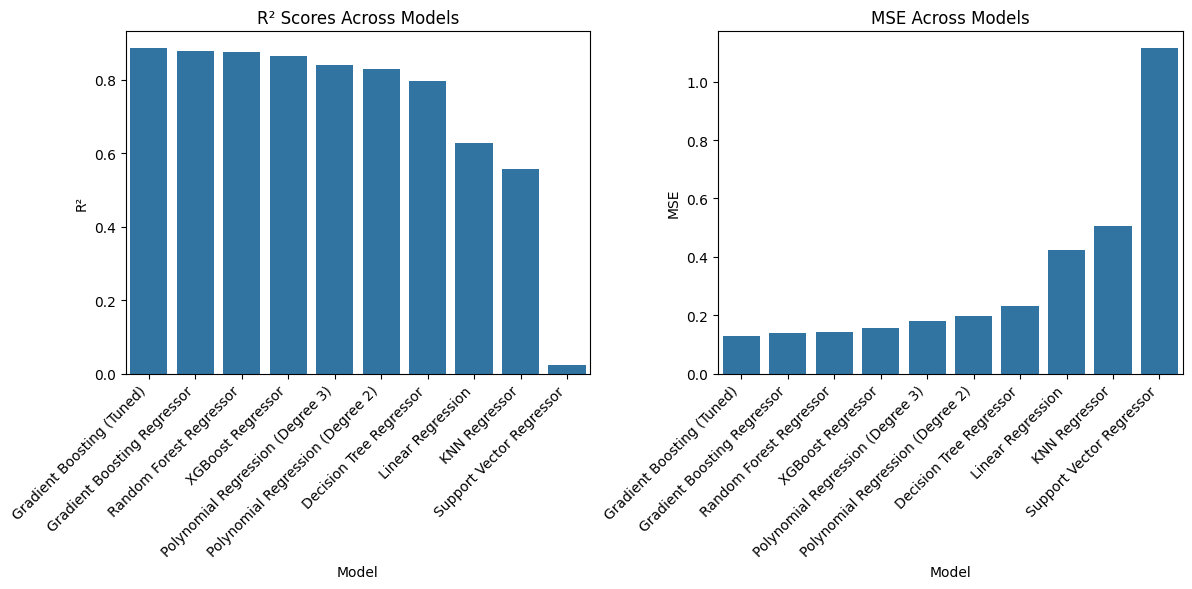

In [25]:
# Update the model results table with the newly evaluated models
model_results = pd.DataFrame({
    'Model': [
        'Linear Regression', 
        'Polynomial Regression (Degree 2)', 
        'Polynomial Regression (Degree 3)',
        'Random Forest Regressor',
        'Gradient Boosting Regressor',
        'Gradient Boosting (Tuned)',
        'Decision Tree Regressor',
        'Support Vector Regressor',
        'KNN Regressor',
        'XGBoost Regressor'
    ],
    'MSE': [
        mse, 
        results['Polynomial Degree 2']['MSE'], 
        results['Polynomial Degree 3']['MSE'],
        mse_rf,
        mse_gb,
        mse_gb_tuned,
        mse_dt,
        mse_svr,
        mse_knn,
        mse_xgb
    ],
    'R²': [
        r2, 
        results['Polynomial Degree 2']['R2'], 
        results['Polynomial Degree 3']['R2'],
        r2_rf,
        r2_gb,
        r2_gb_tuned,
        r2_dt,
        r2_svr,
        r2_knn,
        r2_xgb
    ]
})

# Sort models by R² in descending order
model_results_sorted = model_results.sort_values('R²', ascending=False)

# Styled display of results
print(model_results_sorted.to_string(index=False))

# Visualization of Model Performances
plt.figure(figsize=(12, 6))

# R² Score Comparison
plt.subplot(1, 2, 1)
sns.barplot(x='Model', y='R²', data=model_results_sorted)
plt.title('R² Scores Across Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# MSE Comparison
plt.subplot(1, 2, 2)
sns.barplot(x='Model', y='MSE', data=model_results_sorted)
plt.title('MSE Across Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

The comparison table and visualizations clearly show that the Gradient Boosting Regressor (Tuned) achieved the best performance with the lowest MSE and highest R². Other strong performers include the default Gradient Boosting Regressor, Random Forest Regressor, and XGBoost Regressor. Models like Support Vector Regressor and KNN Regressor performed poorly in comparison.

In [26]:
#export the Gradient Boosting Regressor (Tuned) model
import pickle
pickle.dump(grid_search_expanded, open('model.pkl', 'wb'))

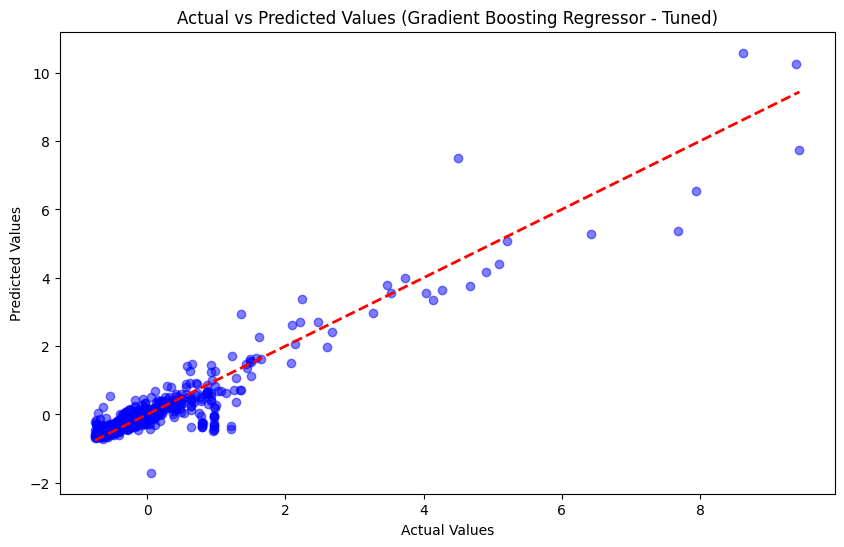

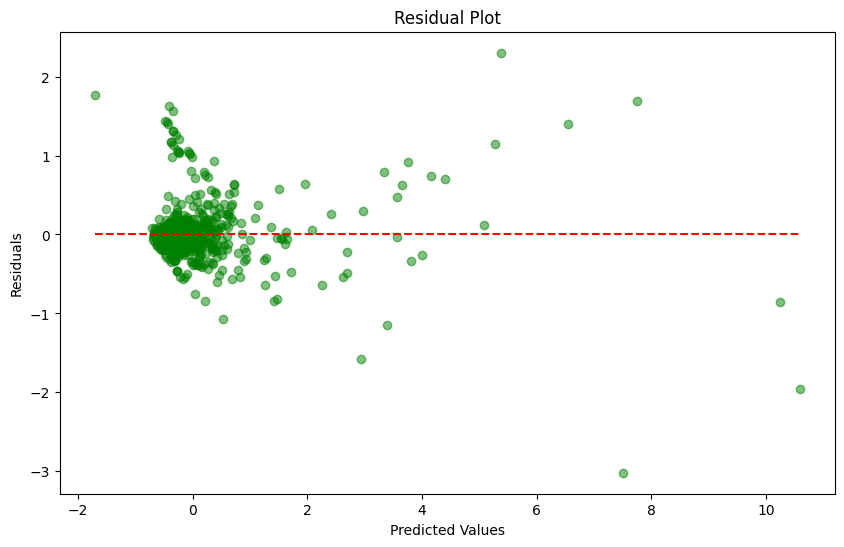

In [27]:
# The error occurs because `confusion_matrix` is designed for classification tasks, not regression tasks.
# For regression tasks, we can visualize predictions in other ways, such as scatter plots of actual vs predicted values.
# Below is the corrected version for regression analysis:

import matplotlib.pyplot as plt
import numpy as np

# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gb_tuned, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Gradient Boosting Regressor - Tuned)')
plt.show()

# Alternatively, explore regression residuals (another way to evaluate the model)
residuals = y_test - y_pred_gb_tuned
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_gb_tuned, residuals, alpha=0.5, color='green')
plt.hlines(y=0, xmin=y_pred_gb_tuned.min(), xmax=y_pred_gb_tuned.max(), color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [28]:
import pandas as pd

# Calculer les résidus
residuals = y_test - y_pred_xgb

# Créer un DataFrame pour afficher les résultats
results_df = pd.DataFrame({
    'Actual Price': y_test,
    'Predicted Price': y_pred_xgb,
    'Difference (Residual)': residuals
})

# Afficher les 10 premières lignes du tableau
print(results_df.head(10))


      Actual Price  Predicted Price  Difference (Residual)
3530      1.230749         1.684388              -0.453639
999      -0.026110        -0.279720               0.253610
3023     -0.216144        -0.244575               0.028430
1550      0.032362        -0.012047               0.044409
2428     -0.296544        -0.208144              -0.088399
3732      0.922601         0.875877               0.046724
2955     -0.391561        -0.313531              -0.078030
3646      0.156469         0.136476               0.019993
465       0.967917        -0.461371               1.429288
1123     -0.144516        -0.308919               0.164403


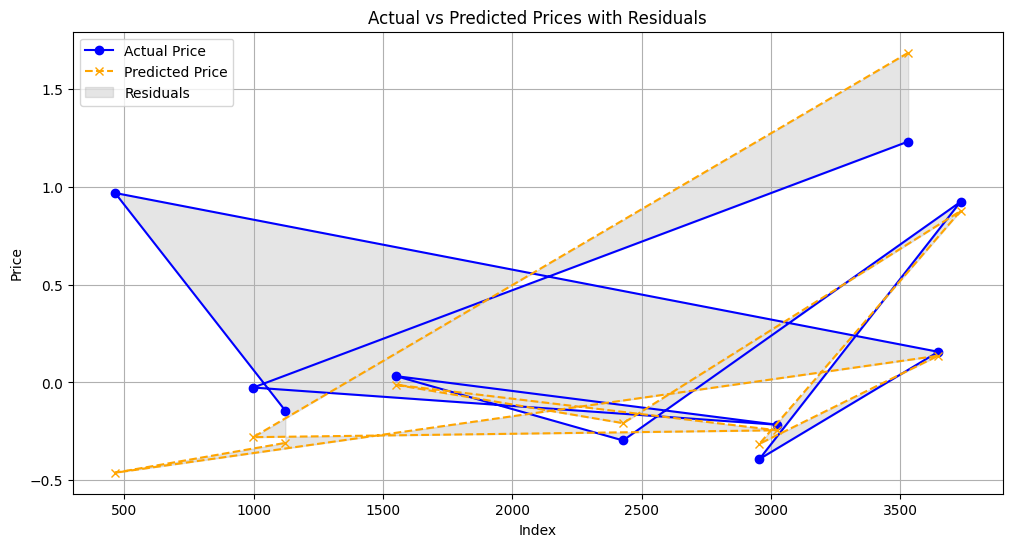

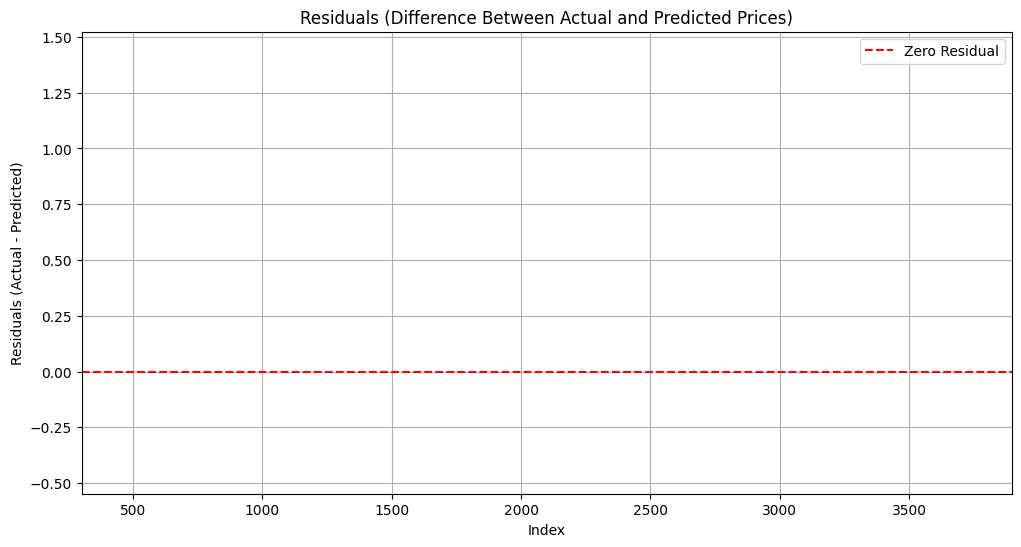

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the provided table
actual_price = [1.230749, -0.026110, -0.216144, 0.032362, -0.296544, 0.922601, 
                -0.391561, 0.156469, 0.967917, -0.144516]
predicted_price = [1.684388, -0.279720, -0.244575, -0.012047, -0.208144, 0.875877, 
                   -0.313531, 0.136476, -0.461371, -0.308919]
residuals = np.array(actual_price) - np.array(predicted_price)
indices = [3530, 999, 3023, 1550, 2428, 3732, 2955, 3646, 465, 1123]

# Plotting Actual vs Predicted Prices
plt.figure(figsize=(12, 6))
plt.plot(indices, actual_price, label="Actual Price", marker='o', linestyle='-', color='blue')
plt.plot(indices, predicted_price, label="Predicted Price", marker='x', linestyle='--', color='orange')
plt.fill_between(indices, actual_price, predicted_price, color='gray', alpha=0.2, label="Residuals")
plt.xlabel("Index")
plt.ylabel("Price")
plt.title("Actual vs Predicted Prices with Residuals")
plt.legend()
plt.grid(True)
plt.show()

# Plotting Residuals
plt.figure(figsize=(12, 6))
plt.bar(indices, residuals, color='green', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', label="Zero Residual")
plt.xlabel("Index")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals (Difference Between Actual and Predicted Prices)")
plt.legend()
plt.grid(True)
plt.show()


In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

# Calcul des métriques
mse = mean_squared_error(y_test, y_pred_gb_tuned)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_gb_tuned)
mape = np.mean(np.abs((y_test - y_pred_gb_tuned) / y_test)) * 100
r2 = r2_score(y_test, y_pred_gb_tuned)
explained_variance = explained_variance_score(y_test, y_pred_gb_tuned)

# Affichage des résultats
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAPE: {mape:.2f}%")
print(f"R²: {r2}")
print(f"Explained Variance: {explained_variance}")


MSE: 0.12926351844391543
RMSE: 0.35953236077426387
MAE: 0.19587669465307225
MAPE: 112.51%
R²: 0.8869069262730424
Explained Variance: 0.8869263230601646


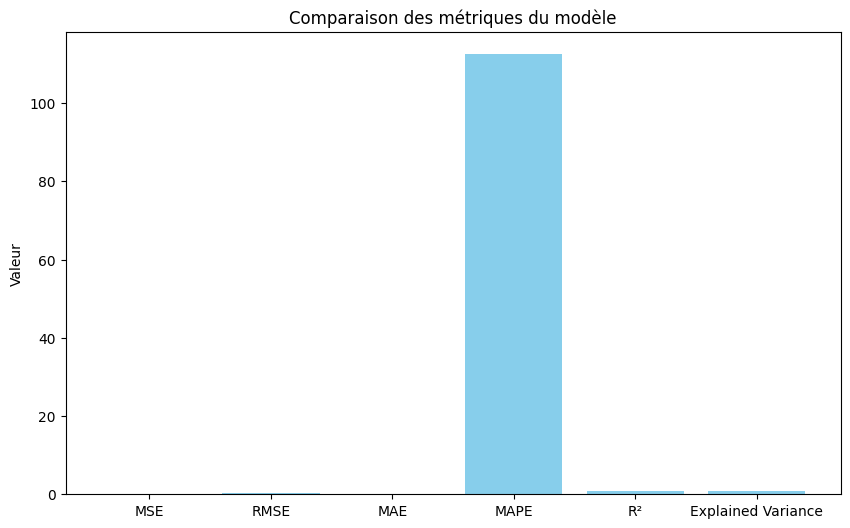

In [31]:
import matplotlib.pyplot as plt

# Liste des métriques et leurs valeurs
metrics = ['MSE', 'RMSE', 'MAE', 'MAPE', 'R²', 'Explained Variance']
values = [mse, rmse, mae, mape, r2, explained_variance]

# Bar plot
plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color='skyblue')
plt.ylabel('Valeur')
plt.title('Comparaison des métriques du modèle')
plt.show()


In [32]:
df_1= pd.read_csv("/work/FinalDF.csv")
#original_column = label_encoders['Brand'].inverse_transform(df_1['Brand'])

original_price = scaler.inverse_transform(df_1[numerical_columns])
df_1

,Unnamed: 0,Brand,Model,Status,Fuel_Type,Transmission,Horse_power,Age,MileagePerYear,Price
0,0,Alfa Romeo,156,occasion,Essence,Manuelle,8.0,24,12500,111110.0
1,1,Alfa Romeo,159,occasion,Diesel,Manuelle,6.0,16,12500,26500.0
2,2,Alfa Romeo,Giulietta,occasion,Essence,Manuelle,7.0,9,18891,38000.0
3,3,Alfa Romeo,Giulietta,occasion,Essence,Automatique,9.0,9,20222,43000.0
4,4,Alfa Romeo,Mito,occasion,Essence,Manuelle,9.0,14,10714,36900.0
...,...,...,...,...,...,...,...,...,...,...
3772,3915,Volvo,S90,neuf,Essence,Automatique,15.0,0,0,273900.0
3773,3916,Volvo,S90,neuf,Essence,Automatique,15.0,0,0,289900.0
3774,3917,Volvo,Xc90,neuf,Essence,Automatique,15.0,0,0,375900.0
3775,3918,Volvo,Xc90,neuf,Essence,Automatique,20.0,0,0,449900.0


In [33]:
import pandas as pd

# Calculer les résidus
residuals = y_test - y_pred_xgb

# Créer un DataFrame pour afficher les résultats
results_df = pd.DataFrame({
    'Actual Price': y_test,
    'Predicted Price': y_pred_xgb,
    'Difference (Residual)': residuals
})

# Afficher les 10 premières lignes du tableau
print(results_df.head(10))

      Actual Price  Predicted Price  Difference (Residual)
3530      1.230749         1.684388              -0.453639
999      -0.026110        -0.279720               0.253610
3023     -0.216144        -0.244575               0.028430
1550      0.032362        -0.012047               0.044409
2428     -0.296544        -0.208144              -0.088399
3732      0.922601         0.875877               0.046724
2955     -0.391561        -0.313531              -0.078030
3646      0.156469         0.136476               0.019993
465       0.967917        -0.461371               1.429288
1123     -0.144516        -0.308919               0.164403


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9158155e-c82c-4f23-93c0-dcd070a7ff4c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>